In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, f1_score, jaccard_score

In [2]:
cell_samples = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
cell_df = pd.read_csv(cell_samples)

In [4]:
print(cell_df.head())

        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


In [5]:
# Sélectionner les données pour la classe 4
malignant_data = cell_df[cell_df['Class'] == 4][0:50]

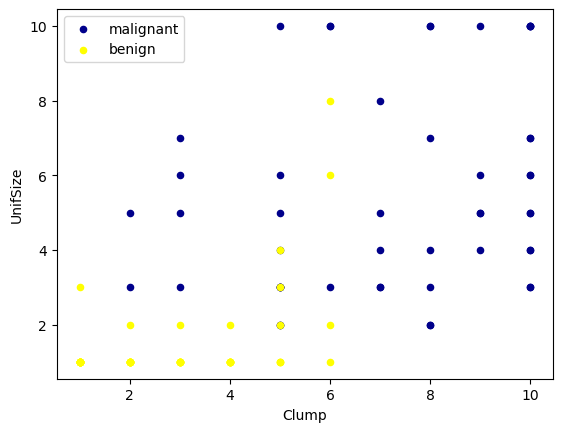

In [9]:
ax = malignant_data.plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
# Ajouter les données pour la classe 2 au même graphique
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)
# Afficher le graphique
plt.show()

In [10]:
print("Types de données par colonne:")
print(cell_df.dtypes)

Types de données par colonne:
ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


In [11]:
# Supprimer les lignes avec des valeurs non numériques dans la colonne 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]

In [12]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
print(cell_df.dtypes)

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object


In [13]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
# Convertir feature_df en tableau NumPy
X = np.asarray(feature_df)

In [14]:
print(X[0:5])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]


In [16]:
y = np.asarray(cell_df['Class'])
print(y[0:5])

[2 2 2 2 2]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [18]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(yhat[0:5])

[2 4 2 4 2]


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Matrice de confusion, sans normalisation
[[85  5]
 [ 0 47]]


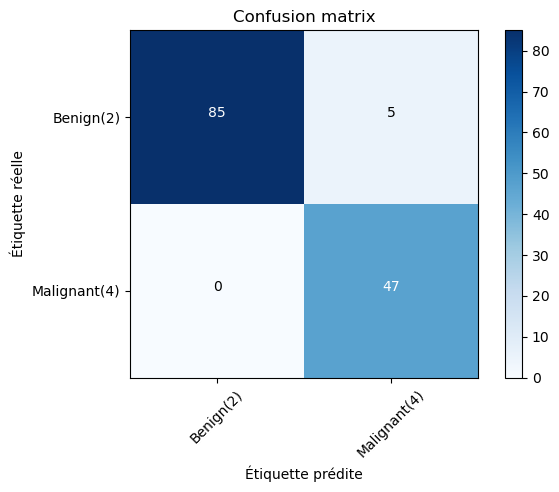

In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrice de confusion normalisée")
    else:
        print('Matrice de confusion, sans normalisation')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Étiquette réelle')
    plt.xlabel('Étiquette prédite')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
# Afficher le rapport de classification
print(classification_report(y_test, yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'], normalize=False, title='Confusion matrix')


In [26]:
# Calculer et afficher le score F1
f1 = f1_score(y_test, yhat, average='weighted')
print(f"Score F1 : {f1}")
# Calculer et afficher le score Jaccard
jaccard = jaccard_score(y_test, yhat, pos_label=2)
print(f"Score Jaccard : {jaccard}")

Score F1 : 0.9639038982104676
Score Jaccard : 0.9444444444444444
